# Notebook Overview

In this notebook we will be creating the persistence diagrams and doing a timeseries tda on the distance matrix to detect anomalies . We will first be using the deep distance matrix which is extracted from GH060066.mp4 video . This can be repeated to all the deep distance matrix from all of the videos to detect anomalies.

# Installing Dependencies

In [ ]:
!pip install data

In [ ]:
!pip install giotto-tda

In [ ]:
!pip install gudhi

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from gtda.time_series import SlidingWindow
from gtda.plotting import plot_point_cloud
from gtda.homology import VietorisRipsPersistence
import cv2
import os
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Global Configuration

In [ ]:
path = '/content/drive/MyDrive/Cow_teats/GH060066_dis_deep.txt'
# video_path = '/content/drive/MyDrive/Cow_teats/key_frame/GH060066_resize.MP4'

# Functions used in the notebook

# Start of the Notebook

In [ ]:
# Reading and Visualizing the deep distance matrix
df = pd.read_csv(path,header=None)
df.head()
data=df[0]

In [ ]:
# Converting the string values to integer values
df = pd.DataFrame(data)

# splitting the strings into separate columns
df_split = df[0].str.split(expand=True)

# Converting to float
df = df_split.apply(pd.to_numeric, errors='coerce', axis=1)

In [ ]:
# Looking at the dataframe
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,716.119873,727.356079,753.822449,844.945312,780.308655,747.197815,843.887207,804.595825,802.469849,848.525085,...,727.783936,783.694458,769.488708,812.934326,828.883301,814.967957,813.528076,837.079773,855.739746,1064.968994
1,730.037476,745.536377,762.036377,860.727356,773.478394,795.138367,837.157471,809.459961,804.388000,862.521851,...,722.837524,797.229675,783.389038,836.395386,822.573303,823.004395,811.452026,857.641357,890.131042,1069.000854
2,729.070190,741.973816,765.825806,862.203491,790.784180,763.022705,845.384155,827.264648,802.421997,865.150269,...,726.069031,794.511597,782.627075,833.041626,838.995361,825.551514,811.357056,846.268616,855.464233,1063.179932
3,744.068970,770.242737,783.334351,888.629150,796.824036,789.113708,846.398804,831.489258,814.012817,877.839111,...,725.075989,818.529297,806.746155,864.591858,845.962280,841.214722,825.400024,851.050720,888.292358,1083.436279
4,765.031250,776.135986,809.724548,906.133423,828.628052,773.053406,883.291992,857.601685,833.248108,891.004944,...,760.993286,830.137695,823.682617,875.232056,871.049316,856.794800,851.808472,875.479065,881.930664,1102.037598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3187,751.898499,869.901489,759.884644,792.776245,801.477966,737.664673,876.472046,732.082520,824.893494,863.125549,...,762.456665,797.003235,831.429199,815.164062,823.457397,805.922852,824.595093,775.851318,894.338013,1032.855713
3188,725.798157,850.426147,761.482544,778.024536,794.310547,711.260620,858.333618,733.054749,812.135010,855.892029,...,762.229614,789.394287,831.443726,779.945435,811.742615,803.500916,828.530884,762.665405,875.865662,1013.237549
3189,774.480713,876.767822,790.967834,837.126953,835.288818,720.969299,875.148193,763.791687,836.581787,897.638306,...,775.137329,841.571899,860.929443,833.385864,855.594849,835.949707,858.696289,778.766846,909.148193,1066.371826
3190,746.333862,848.500671,782.338013,814.769348,831.533691,683.254150,886.078979,762.382080,819.230164,896.236938,...,772.105713,823.018433,863.575867,805.971802,839.414185,811.188477,856.693359,765.947388,894.890381,1055.291504


This is the deep distances of the video GH060066.mp4 , this video has 3192 frames .This data is the deep distance between each frame and the 32 support key frames , hence the 32 columns . Lets take the first column of the data and analyse the distances of each frame .


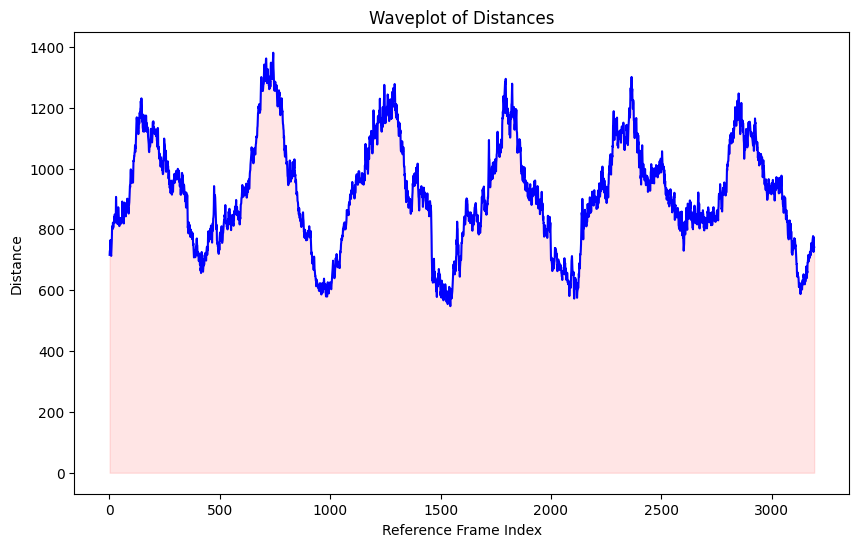

In [ ]:
# Extract the first column
first_col = df.iloc[:, 0]

# Create a waveplot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 3193), first_col, color='b', linewidth=1.5)
plt.fill_between(range(1, 3193), first_col, color='r', alpha=0.1)
plt.title('Waveplot of Distances')
plt.xlabel('Reference Frame Index')
plt.ylabel('Distance')
plt.grid(False)
plt.show()

We can se 6 minimas in the graph which evidently suggests the existence of 5 instance of key frames in the video GH060066.mp4

In [ ]:
# Looking at the first column
first_col

0       716.119873
1       730.037476
2       729.070190
3       744.068970
4       765.031250
           ...    
3187    751.898499
3188    725.798157
3189    774.480713
3190    746.333862
3191    742.179199
Name: 0, Length: 3192, dtype: float64

In [ ]:
# Combine 32 columns into one by taking the mean across each row
df['mean_distance'] = df.mean(axis=1)

In [ ]:
df['mean_distance']

0       807.698889
1       815.843735
2       816.102102
3       831.816126
4       850.940096
           ...    
3187    815.492874
3188    805.513783
3189    838.990877
3190    828.066401
3191    828.772018
Name: mean_distance, Length: 3192, dtype: float64

In [ ]:
df['mean_distance'].describe()

count    3192.000000
mean      954.608075
std       170.184828
min       630.031260
25%       831.428631
50%       943.952804
75%      1083.750670
max      1383.031819
Name: mean_distance, dtype: float64

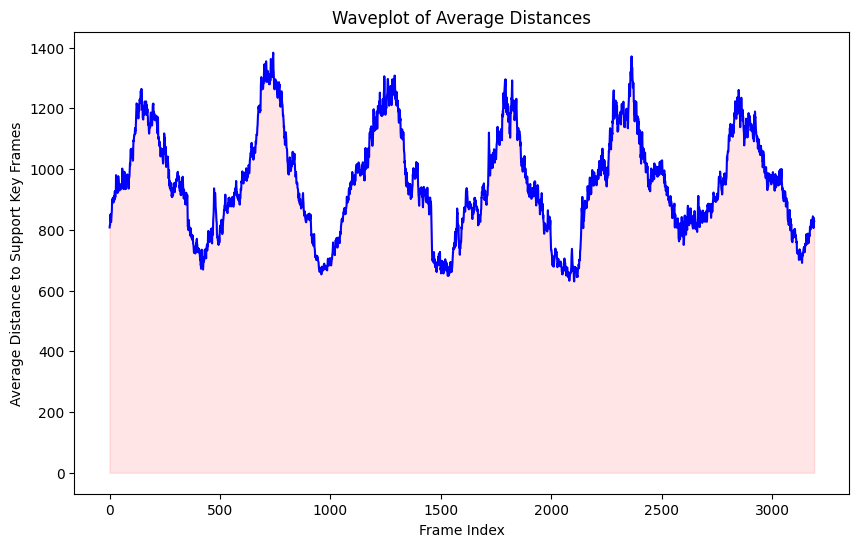

In [ ]:
# Now df['mean_distance'] is the column with the average distance to all support key frames
# We can visualize this new column as a waveplot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['mean_distance'], color='b', linewidth=1.5)
plt.fill_between(df.index, df['mean_distance'], color='r', alpha=0.1)
plt.title('Waveplot of Average Distances')
plt.xlabel('Frame Index')
plt.ylabel('Average Distance to Support Key Frames')
plt.grid(False)
plt.show()

## Frames closer to the support key frames

In [ ]:
df['mean_distance']

0       807.698889
1       815.843735
2       816.102102
3       831.816126
4       850.940096
           ...    
3187    815.492874
3188    805.513783
3189    838.990877
3190    828.066401
3191    828.772018
Name: mean_distance, Length: 3192, dtype: float64

In [ ]:
df['mean_distance'].describe()

count    3192.000000
mean      954.608075
std       170.184828
min       630.031260
25%       831.428631
50%       943.952804
75%      1083.750670
max      1383.031819
Name: mean_distance, dtype: float64

In [ ]:
threshold = df['mean_distance'].mean() - df['mean_distance'].std()
threshold

784.4232462994074

In [ ]:
# filter frames by threshold value

low_value_indices = df.index[df['mean_distance'] < threshold].tolist()
low_value_indices

[366,
 371,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 381,
 382,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 393,
 394,
 395,
 396,
 397,
 398,
 399,
 400,
 401,
 402,
 403,
 404,
 405,
 406,
 407,
 408,
 409,
 410,
 411,
 412,
 413,
 414,
 415,
 416,
 417,
 418,
 419,
 420,
 421,
 422,
 423,
 424,
 425,
 426,
 427,
 428,
 429,
 430,
 431,
 432,
 433,
 434,
 435,
 436,
 437,
 438,
 439,
 440,
 441,
 442,
 443,
 444,
 445,
 449,
 450,
 451,
 452,
 453,
 454,
 455,
 456,
 458,
 463,
 464,
 466,
 488,
 489,
 490,
 491,
 492,
 493,
 494,
 495,
 496,
 497,
 498,
 914,
 916,
 917,
 918,
 919,
 920,
 921,
 922,
 923,
 924,
 925,
 927,
 928,
 929,
 930,
 931,
 932,
 933,
 934,
 935,
 936,
 937,
 938,
 939,
 940,
 941,
 942,
 943,
 944,
 945,
 946,
 947,
 948,
 949,
 950,
 951,
 952,
 953,
 954,
 955,
 956,
 957,
 958,
 959,
 960,
 961,
 962,
 963,
 964,
 965,
 966,
 967,
 968,
 969,
 970,
 971,
 972,
 973,
 974,
 975,
 976,
 977,
 978,
 979,
 980,
 981,
 982,
 983

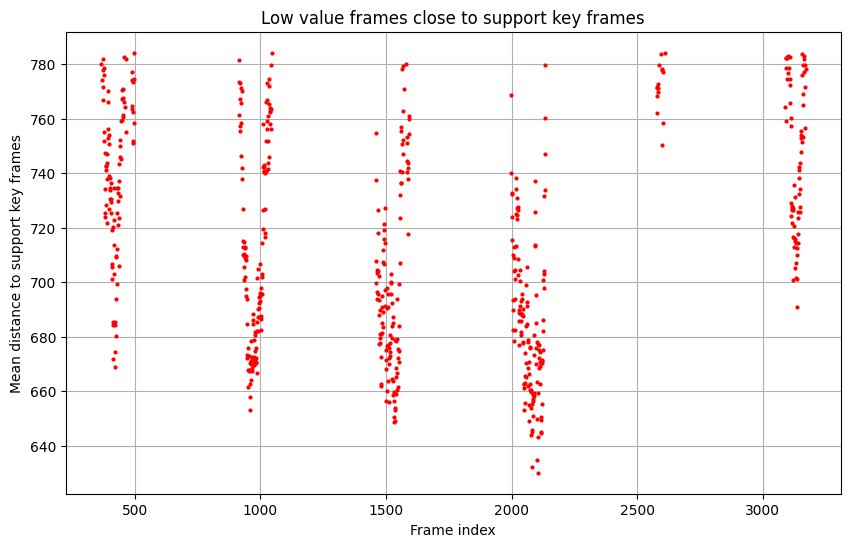

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(low_value_indices, df.loc[low_value_indices, 'mean_distance'], 'ro', markersize=2)
plt.title('Low value frames close to support key frames')
plt.xlabel('Frame index')
plt.ylabel('Mean distance to support key frames')
plt.grid(True)
plt.show()

In [ ]:
windows = SlidingWindow(size=300, stride=1)
X_windows_filtered = windows.fit_transform(df.loc[low_value_indices, ['mean_distance']].values)
print(X_windows_filtered.shape)

(276, 300, 1)


In [ ]:
# Apply TDA to the sliding window data of filtered frames
persistence = VietorisRipsPersistence(metric="euclidean", homology_dimensions=[0], n_jobs=6, collapse_edges=True)
diagrams_filtered = persistence.fit_transform(X_windows_filtered)

# Calculate persistence entropy for the filtered data
persistence_entropy = PersistenceEntropy(normalize=True)
X_filtered = persistence_entropy.fit_transform(diagrams_filtered)

In [ ]:
print(X_filtered.shape)

# Visualize the point cloud for filtered data
plot_point_cloud(X_filtered)

(276, 3)


In [ ]:
X_filtered

array([[ 1.08431994, -1.        , -1.        ],
       [ 1.06960359, -1.        , -1.        ],
       [ 1.0734147 , -1.        , -1.        ],
       [ 1.07293883, -1.        , -1.        ],
       [ 1.07275091, -1.        , -1.        ],
       [ 1.07305806, -1.        , -1.        ],
       [ 1.07539191, -1.        , -1.        ],
       [ 1.07315611, -1.        , -1.        ],
       [ 1.07078391, -1.        , -1.        ],
       [ 1.07150678, -1.        , -1.        ],
       [ 1.07128277, -1.        , -1.        ],
       [ 1.07107684, -1.        , -1.        ],
       [ 1.07289004, -1.        , -1.        ],
       [ 1.07325565, -1.        , -1.        ],
       [ 1.07293257, -1.        , -1.        ],
       [ 1.07123074, -1.        , -1.        ],
       [ 1.07148145, -1.        , -1.        ],
       [ 1.07106653, -1.        , -1.        ],
       [ 1.07115422, -1.        , -1.        ],
       [ 1.07024703, -1.        , -1.        ],
       [ 1.07024891, -1.        , -1.   

## PREVIOUS CODE

In [ ]:
from scipy.io import loadmat
def find_key_frame(base_path,file_names):

  ''' Function to Extract Key Frames from the mat files '''
  key_num_mat = loadmat(f"{base_path}/{file_names[0]}.mat")
  key_num = key_num_mat.get('key_num', [])
  print(f'Key Frame Number for {file_names[0]}.mp4 are : {key_num}')
  return key_num

In [ ]:
vid_path = ''
path = '/content/drive/MyDrive/Cow_teats/GH060066_dis_deep.txt'
video_path = '/content/drive/MyDrive/Cow_teats/key_frame/GH060066_resize.MP4'
file_names = ['GH060066']
base_path = "/content/drive/My Drive/Cow_teats/key_frame"

# Extracting the key frames
key_num = find_key_frame(base_path,file_names)

Key Frame Number for GH060066.mp4 are : [[ 425  950 1550 2066 3132]]


In [ ]:
valid_key_nums = [frame for frame in key_num[0] if frame <= X_basic.shape[0]]

invalid_key_nums = [frame for frame in key_num[0] if frame > X_basic.shape[0]]
if invalid_key_nums:
    print(f"Warning: The following key frame numbers were out of bounds and have been ignored: {invalid_key_nums}")

key_frame_points = X_basic[np.array(valid_key_nums) - 1]

In [ ]:
from scipy.spatial import distance

# Compute the mean of each cluster
cluster_means = {}
unique_labels = np.unique(labels)
for label in unique_labels:
    if label != -1:  # Exclude noise label
        cluster_points = X_basic[labels == label]
        cluster_mean = np.mean(cluster_points, axis=0)
        cluster_means[label] = cluster_mean

# Find the closest cluster to each key frame
closest_clusters = {}
for kf in valid_key_nums:
    kf_point = X_basic[kf - 1]
    min_dist = float('inf')
    closest_cluster = None
    for label, cluster_mean in cluster_means.items():
        dist = distance.euclidean(kf_point, cluster_mean)
        if dist < min_dist:
            min_dist = dist
            closest_cluster = label
    closest_clusters[kf] = closest_cluster

for kf, cluster in closest_clusters.items():
    print(f"Key frame {kf} is closest to cluster {cluster}.")

Key frame 425 is closest to cluster 1.
Key frame 950 is closest to cluster 1.
Key frame 1550 is closest to cluster 1.
Key frame 2066 is closest to cluster 1.


In [ ]:
import numpy as np
from collections import Counter
import builtins
# Count the number of data points in each cluster
cluster_counts = Counter(labels)
print(cluster_counts)

# Find the minimum count
min_count = builtins.min(cluster_counts.values())

# Identify clusters with the minimum data points
small_clusters = [cluster for cluster, count in cluster_counts.items() if count == min_count]

# Extract data points belonging to these clusters
small_cluster_points = X_basic_array[np.isin(labels, small_clusters)]

Counter({0: 3040, -1: 29, 1: 24})


In [ ]:
import numpy as np
from collections import Counter
import builtins
# Count the number of data points in each cluster
cluster_counts = Counter(labels)
print(cluster_counts)

# Find the minimum count
min_count = builtins.min(cluster_counts.values())

# Identify clusters with the minimum data points
small_clusters = [cluster for cluster, count in cluster_counts.items() if count == min_count]

# Extract data points belonging to these clusters
small_cluster_points = X_basic_array[np.isin(labels, small_clusters)]

Counter({2: 1593, 1: 1306, 3: 53, 0: 46, 5: 29, -1: 24, 6: 24, 4: 18})


In [ ]:
# Looking at the small cluster points
print(small_cluster_points)
print(len(small_cluster_points))

[[ 0.51855407  0.5522403  -6.1378465 ]
 [ 0.51784897  0.55241831 -6.1378465 ]
 [ 0.51823655  0.54414993 -6.1378465 ]
 [ 0.51851472  0.54414993 -6.1378465 ]
 [ 0.51895388  0.54414993 -6.1378465 ]
 [ 0.51895119  0.54414993 -6.1378465 ]
 [ 0.51800436  0.54414993 -6.1378465 ]
 [ 0.51814797  0.54414993 -6.1378465 ]
 [ 0.51811338  0.54724092 -6.1378465 ]
 [ 0.52074221  0.55126523 -6.1378465 ]
 [ 0.5211058   0.55126523 -6.1378465 ]
 [ 0.52129295  0.55126523 -6.1378465 ]
 [ 0.52126659  0.55126523 -6.1378465 ]
 [ 0.52199842  0.55233437 -6.1378465 ]
 [ 0.52206052  0.55263618 -6.1378465 ]
 [ 0.52130736  0.55263618 -6.1378465 ]
 [ 0.52153707  0.55263618 -6.1378465 ]
 [ 0.52112421  0.55449945 -6.1378465 ]]
18


In [ ]:
# Create a DataFrame for the extracted cluster number 4
df_temp = pd.DataFrame(small_cluster_points, columns=['X', 'Y', 'Z'])
df_temp['Cluster'] = np.full(18,fill_value=4)

# Create a 3D scatter plot
fig = px.scatter_3d(df_temp, x='X', y='Y', z='Z', color_continuous_scale='viridis', opacity=0.8)

# Show the plot
fig.show()
print(df_temp['Cluster'])

0     4
1     4
2     4
3     4
4     4
5     4
6     4
7     4
8     4
9     4
10    4
11    4
12    4
13    4
14    4
15    4
16    4
17    4
Name: Cluster, dtype: int64


In [ ]:
# Looking at the indices for the cluster group 4
group_1_indicies = np.array(df[df['Cluster']==4].index)
print('Length : ',len(group_1_indicies))
print(group_1_indicies)

Length :  18
[1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597
 1598 1599 1600 1601]


In [ ]:
# Extract the points that meet the conditions
frames = X_basic[group_1_indicies]
print('frames in the X_bbasic ',frames)
# Looking at the outlier indices
print('Group 1 indicies ',group_1_indicies)
# Visualizing the outliers
plot_point_cloud(frames)

frames in the X_bbasic  [[ 0.51855407  0.5522403  -6.1378465 ]
 [ 0.51784897  0.55241831 -6.1378465 ]
 [ 0.51823655  0.54414993 -6.1378465 ]
 [ 0.51851472  0.54414993 -6.1378465 ]
 [ 0.51895388  0.54414993 -6.1378465 ]
 [ 0.51895119  0.54414993 -6.1378465 ]
 [ 0.51800436  0.54414993 -6.1378465 ]
 [ 0.51814797  0.54414993 -6.1378465 ]
 [ 0.51811338  0.54724092 -6.1378465 ]
 [ 0.52074221  0.55126523 -6.1378465 ]
 [ 0.5211058   0.55126523 -6.1378465 ]
 [ 0.52129295  0.55126523 -6.1378465 ]
 [ 0.52126659  0.55126523 -6.1378465 ]
 [ 0.52199842  0.55233437 -6.1378465 ]
 [ 0.52206052  0.55263618 -6.1378465 ]
 [ 0.52130736  0.55263618 -6.1378465 ]
 [ 0.52153707  0.55263618 -6.1378465 ]
 [ 0.52112421  0.55449945 -6.1378465 ]]
Group 1 indicies  [1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597
 1598 1599 1600 1601]


In [ ]:
# Extracting the key frame windows
anamaly_window = []
for i in group_1_indicies :
  anamaly_window.append(X_windows[i,:,:])
print(f'Shape : {np.array(anamaly_window).shape}')

Shape : (18, 100, 32)


In [ ]:
# Looking at the persistence diagram of anomalous windows
diagrams_basic = persistence.fit_transform(anamaly_window)
# Plotting the persistence diagram
plot_diagram(diagrams_basic[0])

In [ ]:
# Looking at the shape of the windows
len(anamaly_window)

18

    Insights : We can see that there are 18 windows having anomalous distance values .


We can consider a frame to be a key frame if the frame distance from all the support key frames(32 images) is minimum.

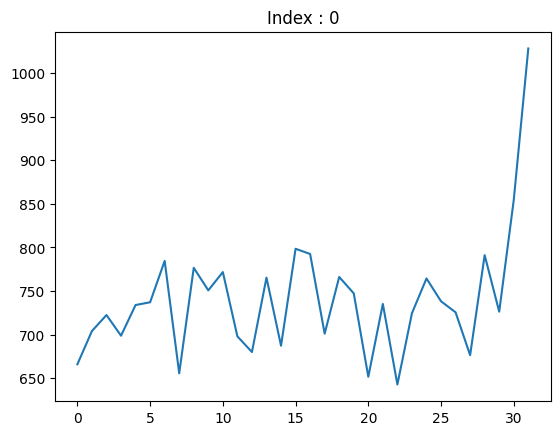

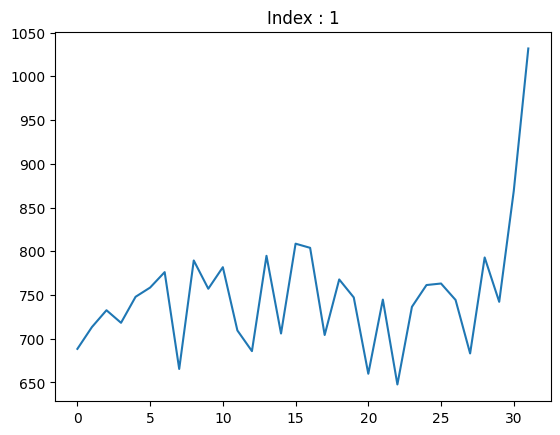

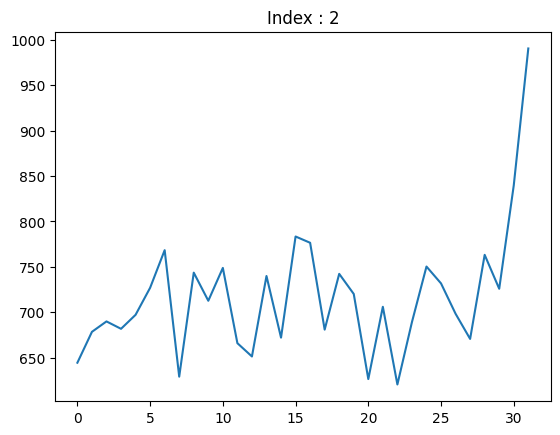

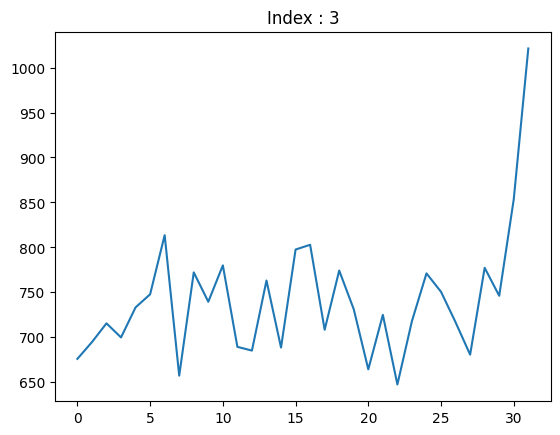

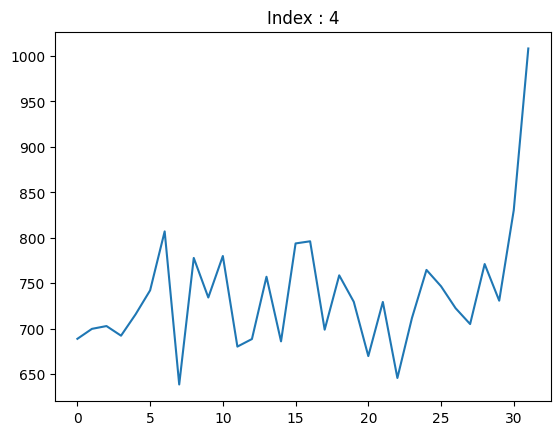

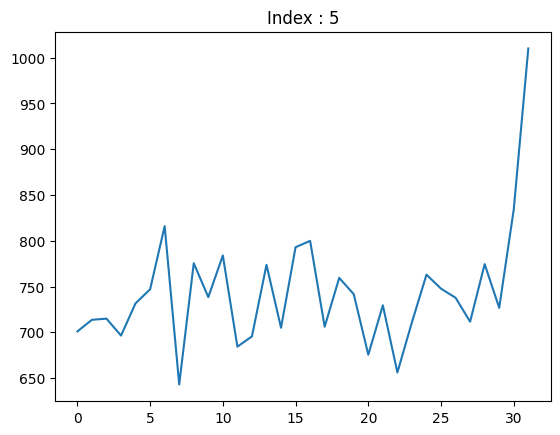

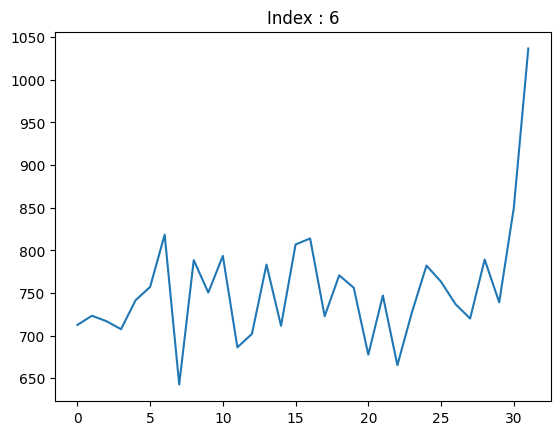

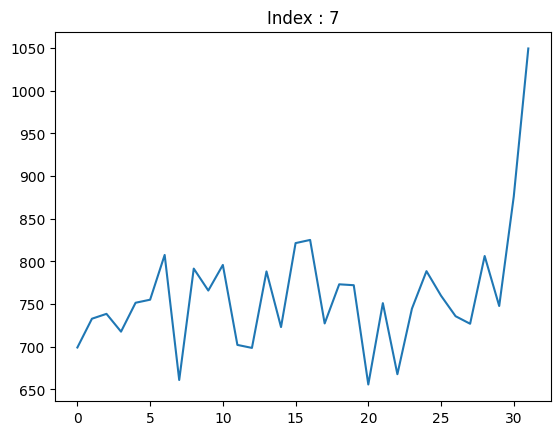

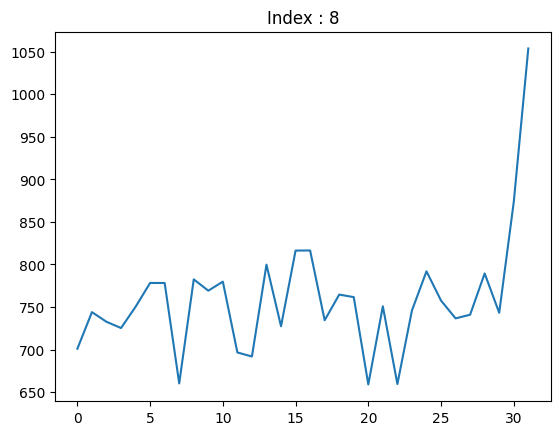

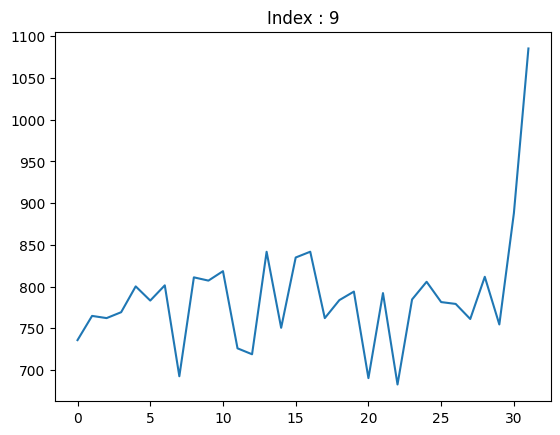

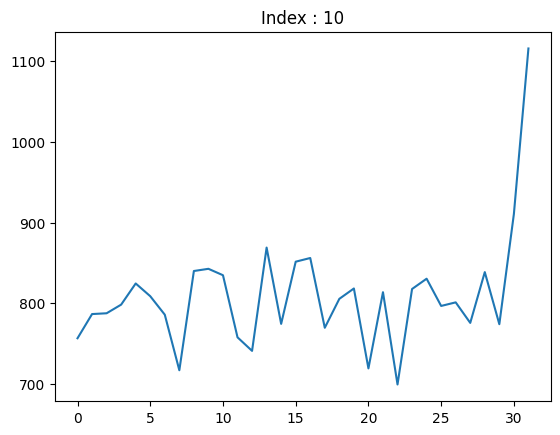

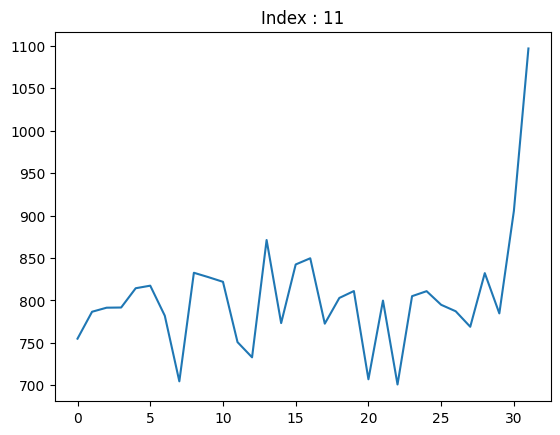

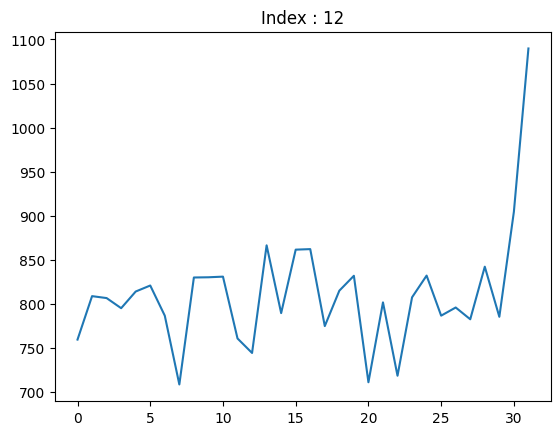

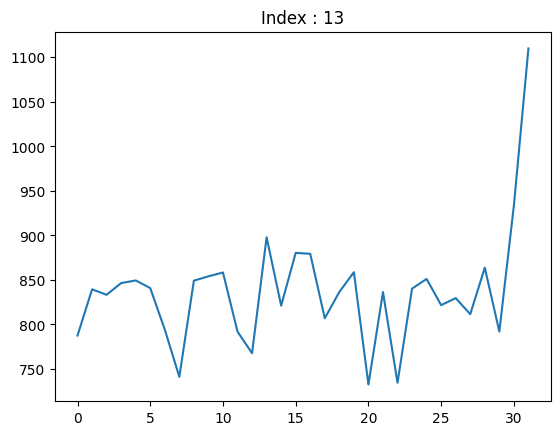

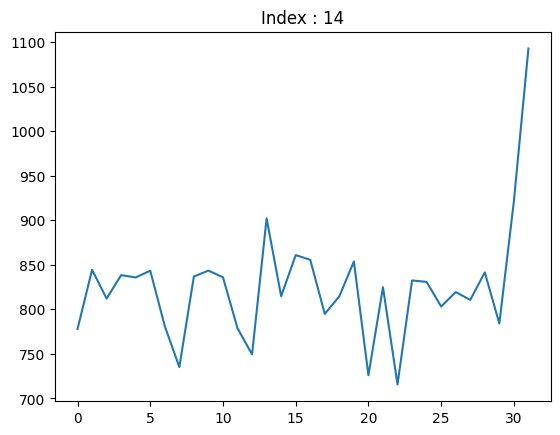

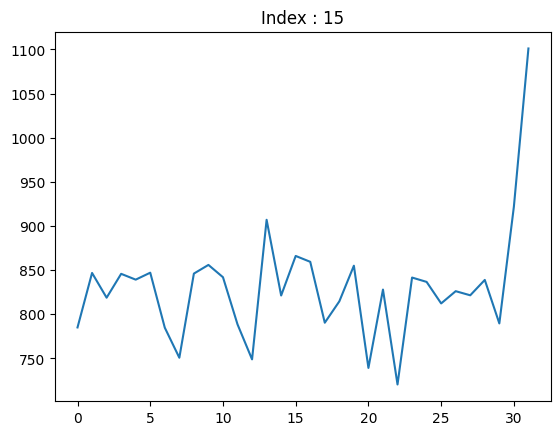

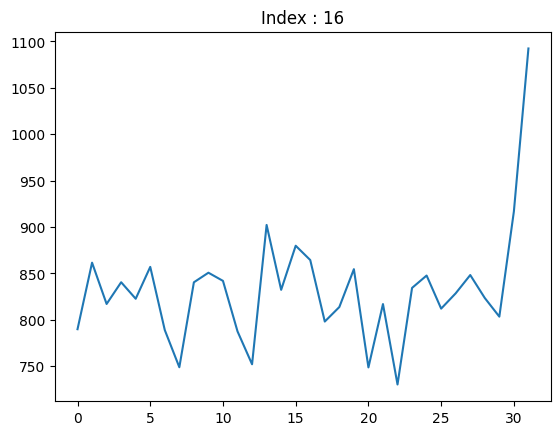

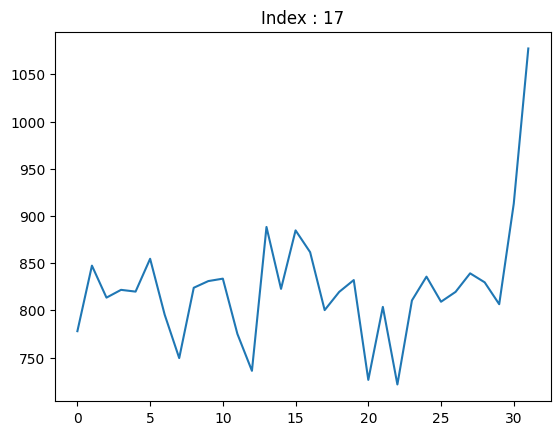

In [ ]:
# Plotting the time series graph for 5 windows
for i in range(0,18):
  plt.plot(np.arange(0,32,1),anamaly_window[0][i])
  plt.title(f'Index : {i}')
  plt.show()

In [ ]:
np.array(anamaly_window).shape

(18, 100, 32)

In [ ]:
anamaly_window = np.array(anamaly_window)

# Find the minimum value in the array
min_value = np.min(anamaly_window)

# Find the indices of the minimum value
index = np.unravel_index(np.argmin(anamaly_window), anamaly_window.shape)

# Extract the row containing the minimum value
min_value_array = anamaly_window[index[0]]

print(f"Minimum value: {min_value}")
print(f"Indices of minimum value: {index}")
print(f"Array containing the minimum value: {[min_value_array][0].shape}")


Minimum value: 620.534912
Indices of minimum value: (0, 2, 22)
Array containing the minimum value: (100, 32)


In [ ]:
# Find the minimum value for each row
row_mins = np.min(min_value_array, axis=1)

# Find the index of the row with the overall minimum value
row_index = np.argmin(row_mins)

# Extract the row with the minimum value
min_row = min_value_array[row_index]

print(f"Row index with the minimum value: {row_index}")
print(f"Row containing the minimum value: {min_row}")
print(f"Row shape containing the minimum value: {min_row.shape}")

Row index with the minimum value: 2
Row containing the minimum value: [644.496338 678.488953 689.96582  681.821838 697.228882 727.000854
 768.405457 629.151489 743.663574 712.71228  748.871094 666.004761
 651.358765 739.968994 672.091248 783.462769 776.551147 680.914368
 742.324097 720.174744 626.473877 706.074341 620.534912 689.198364
 750.3797   731.809082 698.398071 670.695862 763.265991 725.917725
 839.723816 990.475342]
Row shape containing the minimum value: (32,)


In [ ]:
# Extracting the minimum row from X_windows
X_windows.shape


(3093, 100, 32)

In [ ]:
index_found = None
# Iterate through each array in X_windows
for idx, window in enumerate(X_windows):
    if np.any(np.all(window == min_row, axis=1)):  # Check if min_row exists in the current window
        index_found = idx
        break

if index_found is not None:
    print(f"Index of min_row in X_windows: {index_found}")
else:
    print("min_row not found in X_windows.")


Index of min_row in X_windows: 1487


In [ ]:
#Instantiating the output folder in runtime memory
output_folder = '/content/sample_data/all_frames'
os.makedirs(output_folder, exist_ok=True)

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

frame_count = 0  # to count the number of frames processed

while True:
    ret, frame = cap.read()
    if not ret:
        print("Done extracting frames.")
        break

    frame_filename = os.path.join(output_folder, f"frame_{frame_count}.png")
    cv2.imwrite(frame_filename, frame)
    frame_count += 1

# Release the vid capture obj
cap.release()

print(f"Extracted {frame_count} frames and saved in '{output_folder}'")


Done extracting frames.
Extracted 3192 frames and saved in '/content/sample_data/all_frames'


In [ ]:
out_path = '/content/sample_data/all_frames'

In [ ]:
frame_number = [int(index_found)]

In [ ]:
# Checking the matching frames which are in the extracted videos
import re
frame_number = []
for files in os.listdir(out_path):
  find = (re.findall(r'\d+',files))
  if (int(find[0])) in matching_indices :
    frame_number.append(int(find[0]))

In [ ]:
# Checking how many instance is present
len(frame_number)

1

In [ ]:
# Looking at the frame numbers which exists
frame_number

[1487]

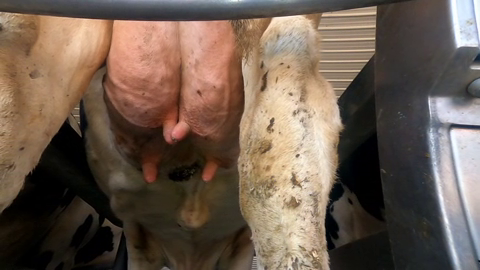

In [ ]:
# Plotting the anomalous frames
from google.colab.patches import cv2_imshow
for i in frame_number:
  path = os.path.join(out_path,f"frame_{i}.png")
  im = cv2.imread(path)
  cv2_imshow(im)
  plt.show()

# Next Steps.

- Look at all the 6 groups to identify KeyFrames.

- Change the epsilon and max_sample values.

- Make a pipeline for this whole process and iteratively do this for a different video to compare the effectiveness of this method.

# Looking at the Next Group .

